# MACHINE LEARNING
## AUTHOR: ANTE DUJIC
<hr style="border:2px solid gray"> </hr>

<center><img src="https://learn.microsoft.com/en-us/windows/ai/images/winml-graphic.png" width="800"/></center>

Machine learning is a proces of programming computers to optimize a performance criterion using some example data or the previous experiences. We have a model defined up to some parameters, and learning is the execution of a computer program to optimize the parameters of the model using the training data or past experience. The model may be predictive or descriptive. Predictive model makes predictions in the future and the descriptive model gains knowledge from the data [1] Some implementations of machine learning use data and neural networks in a way that mimics the working of a biological brain. [2] Human brain cells (neurons) form a complex, highly interconnected network and send electrical signals between eachother to help process information. Similarly, an artificial neural network is made of artificial neurons that work together to solve a problem. Artificial neurons are software modules, called nodes, and artificial neural networks are software programs or algorithms that use computing systems to solve mathematical calculations. [3]

<hr style="border:2px solid gray"> </hr>

### SINGLE NEURON
***

An artificial neuron is a mathematical function. It is also often referred to as a perceptron Neuron takes one or more inputs that are multiplied by values called “weights” and added together. This value is then passed to a non-linear function, known as an activation function, to become the neuron’s output. [4]

<center><img src="img/single_neuron.drawio.svg" width="500"/></center>

Below is a diagram of a single input neuron.

#### SINGLE INPUT NEURON
***

<center><img src="img/single_input.drawio (1).svg" width="400"/></center>

Single input neuron is essentialy acting as a model for fitting a straight line . Value *x* and the corresponding *y* values will be supplied to us. We then need to find the relationship between those two values.

$$y = mx + c$$

$$ \phi (x) = x $$

$$ \phi (x_1 w_1 + w_0) = x_1 w_1 + w_0 $$


In [1]:
# Numerical arrays
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Neural networks
import tensorflow.keras as keras

In [2]:
# Identity activation function
def identity(x):
    return x

Identity or Linear activation function is the simplest activation function of all. It applies identity operation on data and output data is proportional to the input one. [5]

In [3]:
# Firing a neuron
def fire_neuron(x, w, phi):
    return phi(np.sum(x * w))

To activate the neuron, function needs a list of *x* values. The first one is the *bias* and needs to be 1. It also need an array of the same size as *x* which has the weights of all the values, *w* and the activation function, *phi*. Those are inputted below.

In [4]:
# Our x values - always has to have 1.0 at index 0
x = np.array([1.0, 4.0])

# Our weights
w = np.array([2.0, 3.0])

x, w

(array([1., 4.]), array([2., 3.]))

In [5]:
fire_neuron(x, w, identity)

14.0

#### GENERATE DATA
***

We will generate some data, input *x* and output *y*. Those values are pairs, which means that each value *x* has its corresponding value *y* - there is a relationship between them.

In [6]:
# Real-world input values - x
data_in = np.arange(1.0, 13.0, 0.1)
# Fist 10 values
data_in[0:10]

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

In [7]:
# Real-world output values - y
data_out = 4.0 * data_in + np.random.normal(0.0, 1.0, len(data_in))
# First 10 values
data_out[0:10]

array([3.20291431, 4.88437155, 5.57013174, 6.34347903, 6.70370025,
       5.99312263, 7.35344529, 5.58481432, 9.28421462, 7.09767398])

The relationship we generated is that the output is 4 times input, fixed for the noise.

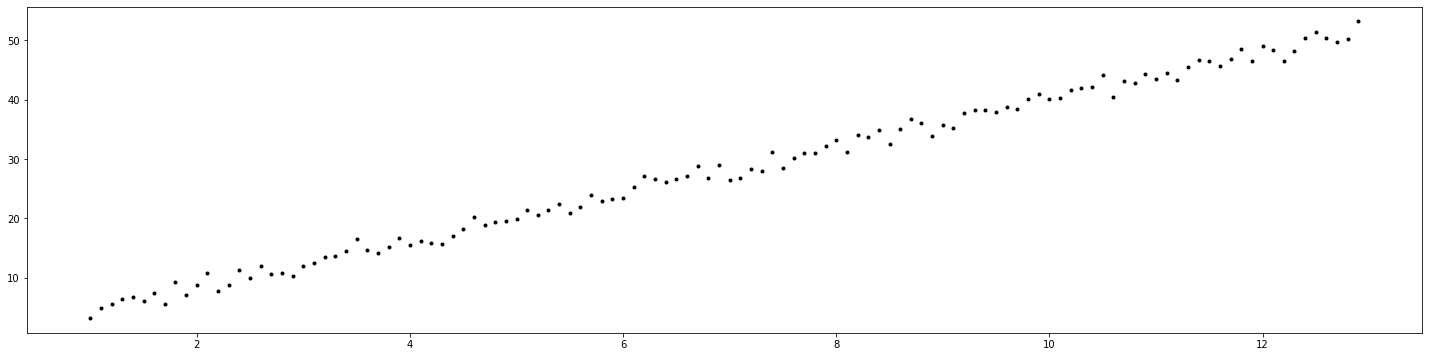

In [8]:
fig, ax = plt.subplots(figsize=(25, 6))
plt.plot(data_in, data_out, 'k.');

#### TRAINING "STEP BY STEP"
***

The idea of training is to give neuron sample input and output values we know and change the weights to try and find the relationship of those values. So, the goal is to create an algorithm that updates w to move the output towards the real output.

In [9]:
# An index in the data set
i = 5

In [10]:
# Actual input/output pair from the real world
data_in[i], data_out[i]

(1.5000000000000004, 5.9931226288048665)

We see below what the neuron currently outputs for the real-world input, based on current weights.

In [11]:
# Initial weights
w =  np.array([0.0, 1.0])
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

1.5000000000000004

Considering we've generated the data, we already know that the weight should be close to 4 (4 fixed for the noise). We can see below what the neuron could output for the real-world input, based on better weights.

In [12]:
# Initial weights
w =  np.array([0.0, 4.0])
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

6.000000000000002

##### COST
***

As stated above the goal is to find the better weight. We'll do that using cost function.


$$ \sum_i (y_i - mx_i - c)^2 $$

$$ \Rightarrow \sum_i (y - x w)^2 $$

In [13]:
# Usually use sum of squares
def cost(w, x, phi, y):
    pred = fire_neuron(x, w, phi)
    return (y - pred)**2

In [14]:
# An index in the data set
i = 5

In [15]:
# Cost of initial w
w = np.array([0.0, 1.0])
cost(w, data_in[i], identity, data_out[i])

20.188150957478346

In [16]:
# Cost of a "better" w
w = np.array([0.0, 4.0])
cost(w, data_in[i], identity, data_out[i])

4.729823455567699e-05

As expected the cost with weight [0.0, 4.0] is much smaller then the cost with the weight [0.0, 1.0].

##### TRAINING
***


To train the data, we'll try to improve *w* value based on the given *x* and *y* values.

The idea is to get the smaller and smaller cost value by continously adjusting the weights. This will be done using hyoerparameters. In Machine Learning, hyperparameter is a parameter whose value is used to control the learning process. [6] It is chosen before the training.

In [17]:
# Hyperparameter
learning_rate = 0.001

In [18]:
def train_neuron(x, y, w, phi):
    # The possible adjustment to the weights
    adjust = np.array([0.0, learning_rate])
    # Calculate the current cost.
    current = cost(w, x, phi, y)
    # Calculate the cost with slight adjustment to the weights
    adding = cost(w + adjust, x, phi, y)
    # If the adjusted weights lower the cost, update the weights
    if adding < current:
        w = w + adjust
    # Otherwise move in the other direction
    else:
        w = w - adjust
    return w

In [19]:
# Set some initial weights
w = np.array([0.0, 1.0])

In [20]:
# The training values
data_in[i], data_out[i]

(1.5000000000000004, 5.9931226288048665)

In [21]:
# Current neuron output for data_in[i]
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

1.5000000000000004

In [22]:
# Nudge the weights towards better values
w_improved = train_neuron(data_in[i], data_out[i], w, identity)
w_improved

array([0.   , 1.001])

In [23]:
# Current neuron output for data_in[i]
fire_neuron(np.array([1.0, data_in[i]]), w_improved, identity)

1.5015000000000003

We see above that the adjusted output we get gives a slightly better value - it is moving towards the value close to 24. To keep adjusting the weight, we'll put the function in the loop. Once the cost stops getting lower, we will get the best *w* value that, in our case, should be close to 4.

In [24]:
# Set some initial weights
w = np.array([0.0, 1.0])

# Loop several times
for epoch in range(10000):
    for i in range(len(data_in)):
        w = train_neuron(data_in[i], data_out[i], w, identity)

# Show w.
w

array([0.   , 4.018])

#### TRAINING USING KERAS
***

In [25]:
# Create a new sequential neural network
model = keras.Sequential()

In [26]:
# Add a dense layer with 1 neuron and the identity activation function
model.add(keras.layers.Dense(units=1))

The cost function and loss function refer to the same context. We calculate the cost function as the average of all loss function values whereas we calculate the loss function for each sample output compared to its actual value. [7] The purpose of loss functions is to compute the quantity that a model should seek to minimize during training. [8] Same as in the "step by step" training, we'll use the mean squared error function.

$$ \sum_i (y_i - mx_i - c)^2 $$

$$ \Rightarrow \sum_i (y - x w)^2 $$

In [27]:
# Compile the neural network
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

Keras requires 2d array where each value is an element of an array. Therefore, we need to reshape the original data, which is 1d array.

In [28]:
print ("1d:\n", data_in[0:10])

1d:
 [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]


In [29]:
# https://stackoverflow.com/a/47468541
data_in = data_in.reshape(-1, 1)
print ("2d:\n", data_in[0:10])

2d:
 [[1. ]
 [1.1]
 [1.2]
 [1.3]
 [1.4]
 [1.5]
 [1.6]
 [1.7]
 [1.8]
 [1.9]]


In [30]:
data_out = data_out.reshape(-1, 1)

In [31]:
# Train the neural network
model.fit(data_in, data_out, epochs=5, batch_size=32)

Epoch 1/5
4/4 [==============================] - 1s 3ms/step - loss: 279.9603 - accuracy: 0.0000e+00
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 1.1305 - accuracy: 0.0000e+00
Epoch 3/5
4/4 [==============================] - 0s 3ms/step - loss: 1.1333 - accuracy: 0.0000e+00
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 1.2649 - accuracy: 0.0000e+00
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 1.1213 - accuracy: 0.0000e+00


In [32]:
# Get weight
# https://stackoverflow.com/a/44569375
w_keras = model.layers[0].get_weights()[0]
print (w_keras)

[[3.9408238]]


In [33]:
print("Step by step weight: ", w[1])
print("Keras weight:", w_keras[0][0])

Step by step weight:  4.017999999999676
Keras weight: 3.9408238


##### TESTING

In [34]:
# Test input values
data_test = np.linspace(-10.0, 20.0, 1001).reshape(-1, 1)

# Feed test values into neural network
preds = model.predict(data_test)

32/32 [==============================] - 0s 1ms/step


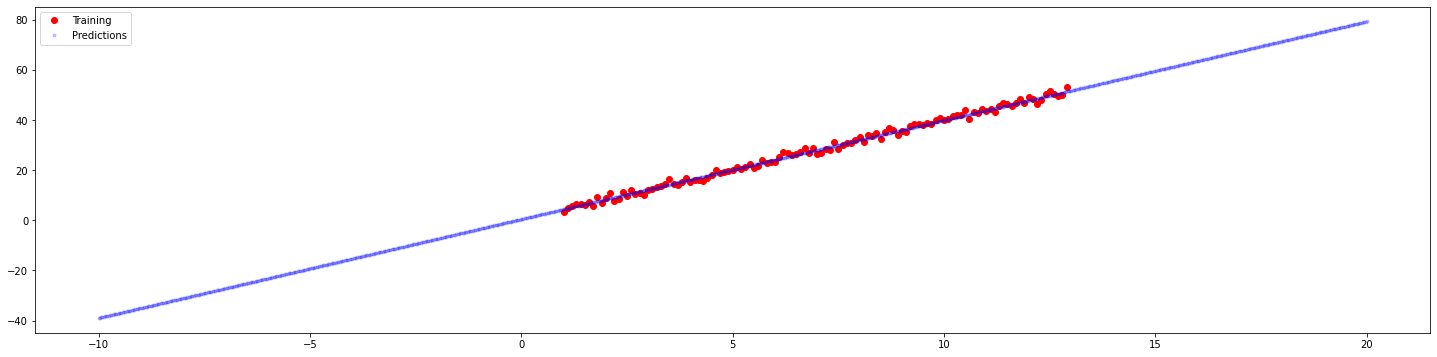

In [35]:
# Plot the values
fig, ax = plt.subplots(figsize=(25, 6))

# Plot the original data set
ax.plot(data_in.flatten(), data_out.flatten(), 'ro', label='Training')

# Plot the predicted data set
ax.plot(data_test.flatten(), preds.flatten(), 'b.',alpha=0.2, label='Predictions');
ax.legend()
plt.show()

It is visible that the neuron has learned the relationship between the input and output data.

## REFERENCES
***

1. GeeksforGeeks (2022), An introduction to Machine Learning, Available at: https://www.geeksforgeeks.org/introduction-machine-learning/
2. Wikipedia (2023), Machine Learning, Available at: https://en.wikipedia.org/wiki/Machine_learning
3. AWS (2022), What is a Neural Network, Available at: https://aws.amazon.com/what-is/neural-network/
4. Ronaghan, S. (2018), Deep Learning: Overview of Neurons and Activation Functions, Available at: https://srnghn.medium.com/deep-learning-overview-of-neurons-and-activation-functions-1d98286cf1e4
5. Labs, M. (2017), Secret Sauce behind the beauty of Deep Learning: Beginners guide to Activation Functions, Available at: https://towardsdatascience.com/secret-sauce-behind-the-beauty-of-deep-learning-beginners-guide-to-activation-functions-a8e23a57d046#
6. Wikipedia (2022), Hyperparameter (machine learning), Available at: https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)
7. Gupta, S. (2022), The 7 Most Common Machine Learning Loss Functions, Available at: https://builtin.com/machine-learning/common-loss-functions
8. Keras (2022), Losses, Available at: https://keras.io/api/losses/